<a href="https://colab.research.google.com/github/genarioazevedoufape/atividades_pet_data_science/blob/main/C%C3%B3pia_de_Atividade_M%C3%B3dulo_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sobre a base de dados**

Os dados de rotatividade de clientes de telecomunicações contêm informações sobre uma empresa de telecomunicações fictícia que forneceu serviços de telefone residencial e Internet para 7.043 clientes na Califórnia.

**Dicionário de dados**


* CustomerId: Customer Id
* Gender: Gender
* SeniorCitizen: Whether the customer is elderly (1.0)
* Partner: Whether the customer has a partner (Yes, No)
* Dependents: Whether the customer has dependents (Yes, No) (child, mother, father...)
* tenure: The number of months the customer stays in the company
* PhoneService: Whether the customer has phone service (Yes, No)
* MultipleLines: Whether the customer has more than one line (Yes, No, No phone service)
* InternetService: Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes, No, no Internet service)
* OnlineBackup: Whether the customer has an online backup (Yes, No, no Internet service)
* DeviceProtection: Whether the customer has device protection (Yes, No, no Internet service)
* TechSupport: Whether the customer receives technical support (Yes, No, no Internet service)
* StreamingTV: Whether the customer has broadcast TV (Yes, No, no Internet service)
* StreamingMovies: Whether the customer is streaming movies (Yes, No, no Internet service)
* Contract: Customer's contract period (Month to month, One year, Two years)
* PaperlessBilling: Whether the customer has a paperless invoice (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer, Credit card)
* MonthlyCharges: Amount collected from the customer monthly
* TotalCharges: Total amount collected from the customer
* Churn: Yes = the customer left the company this Month. No = the customer remained with the company.

#### **Faça uma análise exploratoria da base de dados. Utilize das técnicas que aprendeu nas aulas para analisar como os dados estão distribuidos e quais as relações entre eles. Elabore perguntas que podem ser respondidas através dessa análise e justifique suas respostas com base nos dados.**

*Nesta atividade será avaliada sua habilidade de aplicar comandos do pandas para extrair conhecimento dos dados, assim como sua resposta para cada questão levantada.*




Exemplo de perguntas que podem ser respondidas:



* Qual a porcentagem de clientes que cancelaram o serviço (churn)?
* Qual a distribuição dos clientes por gênero, idade (SeniorCitizen), estado civil (Partner), dependentes (Dependents)?
* Qual a média, mediana e desvio padrão da permanência na empresa (tenure) e dos valores mensais (MonthlyCharges) e totais (TotalCharges)?
* Clientes do gênero masculino ou feminino têm maior propensão ao churn?
* Clientes idosos (SeniorCitizen) tendem a cancelar o serviço com mais frequência?
* Clientes casados (Partner) ou com dependentes (Dependents) apresentam taxas de churn diferentes?
* Existe alguma relação entre o número de linhas telefônicas (MultipleLines) e o churn?
* Clientes com internet de fibra óptica (Fiber optic) cancelam menos que os demais?
* Serviços adicionais como segurança online (OnlineSecurity), backup online (OnlineBackup) e proteção de dispositivos (DeviceProtection) afetam a taxa de churn?
* O tipo de contrato (Month to month, One year, Two years) influencia na permanência do cliente?
* Qual a proporção de clientes que possui telefone fixo (PhoneService)?
* Quantos clientes possuem internet (InternetService) e qual a distribuição entre os tipos (DSL, Fiber optic)?
* Qual a porcentagem de clientes que utiliza serviços de streaming (StreamingTV, StreamingMovies)?
* Existe alguma relação entre o valor mensal faturado (MonthlyCharges) e o churn?
* O valor total faturado (TotalCharges) está associado a propensão do cliente cancelar o serviço?
* Qual o método de pagamento mais utilizado pelos clientes (Electronic check, Postal check, Bank transfer, Credit card)?
* Existe alguma relação entre o método de pagamento e o churn?
* Clientes com fatura eletrônica (PaperlessBilling) tendem a cancelar menos?


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [ ]:
path = 'https://raw.githubusercontent.com/profEraylson/datasets/main/churn_telecom.csv'

df = pd.read_csv(path)

##Validando Dataframe

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast='float', errors='coerce')
df.TotalCharges.dtype

dtype('float32')

In [ ]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=7043, step=1)

###Pré-Visualização dos Dados Gerais

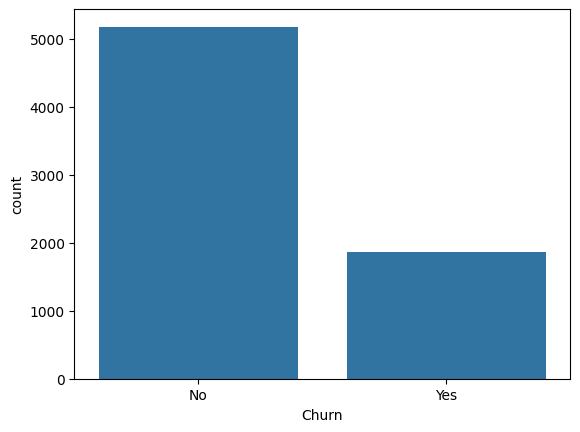

In [ ]:
#Variável Churn

fig = sns.countplot(x='Churn', data=df)
plt.show()


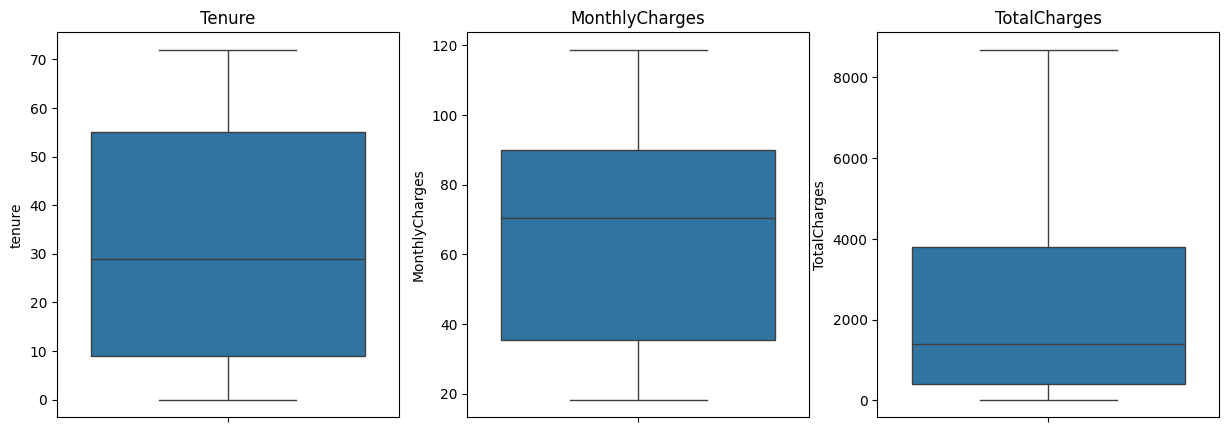

In [ ]:
#Plotando boxplots para procurar algumas estatísticas nesses recursos, bem como valores discrepantes
fig, ax = plt.subplots(1,3, figsize =(15,5))

sns.boxplot(df.tenure, ax=ax[0]).set(title='Tenure')
sns.boxplot(df.MonthlyCharges, ax=ax[1]).set(title='MonthlyCharges')
sns.boxplot(df.TotalCharges, ax=ax[2]).set(title='TotalCharges')
plt.show()


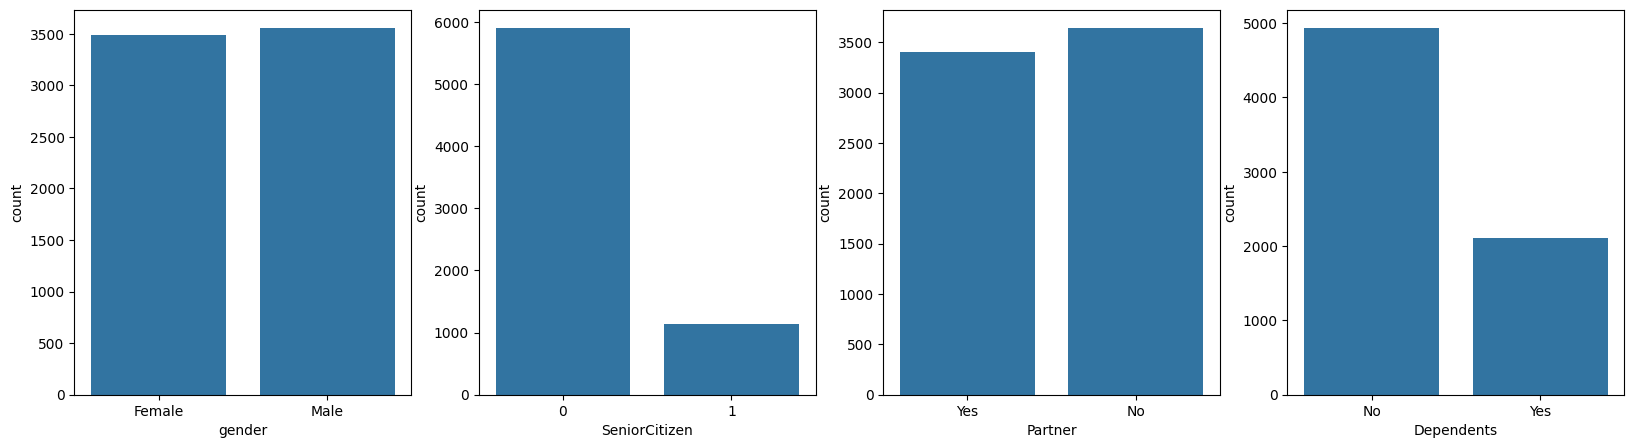

In [ ]:
#Visualizando caracteristicas demográficas
fig, ax = plt.subplots(1,4, figsize=(20,5))

sns.countplot(x= df.gender, ax=ax[0])
sns.countplot(x= df.SeniorCitizen, ax=ax[1])
sns.countplot(x= df.Partner, ax=ax[2])
sns.countplot(x= df.Dependents, ax=ax[3])
plt.show()

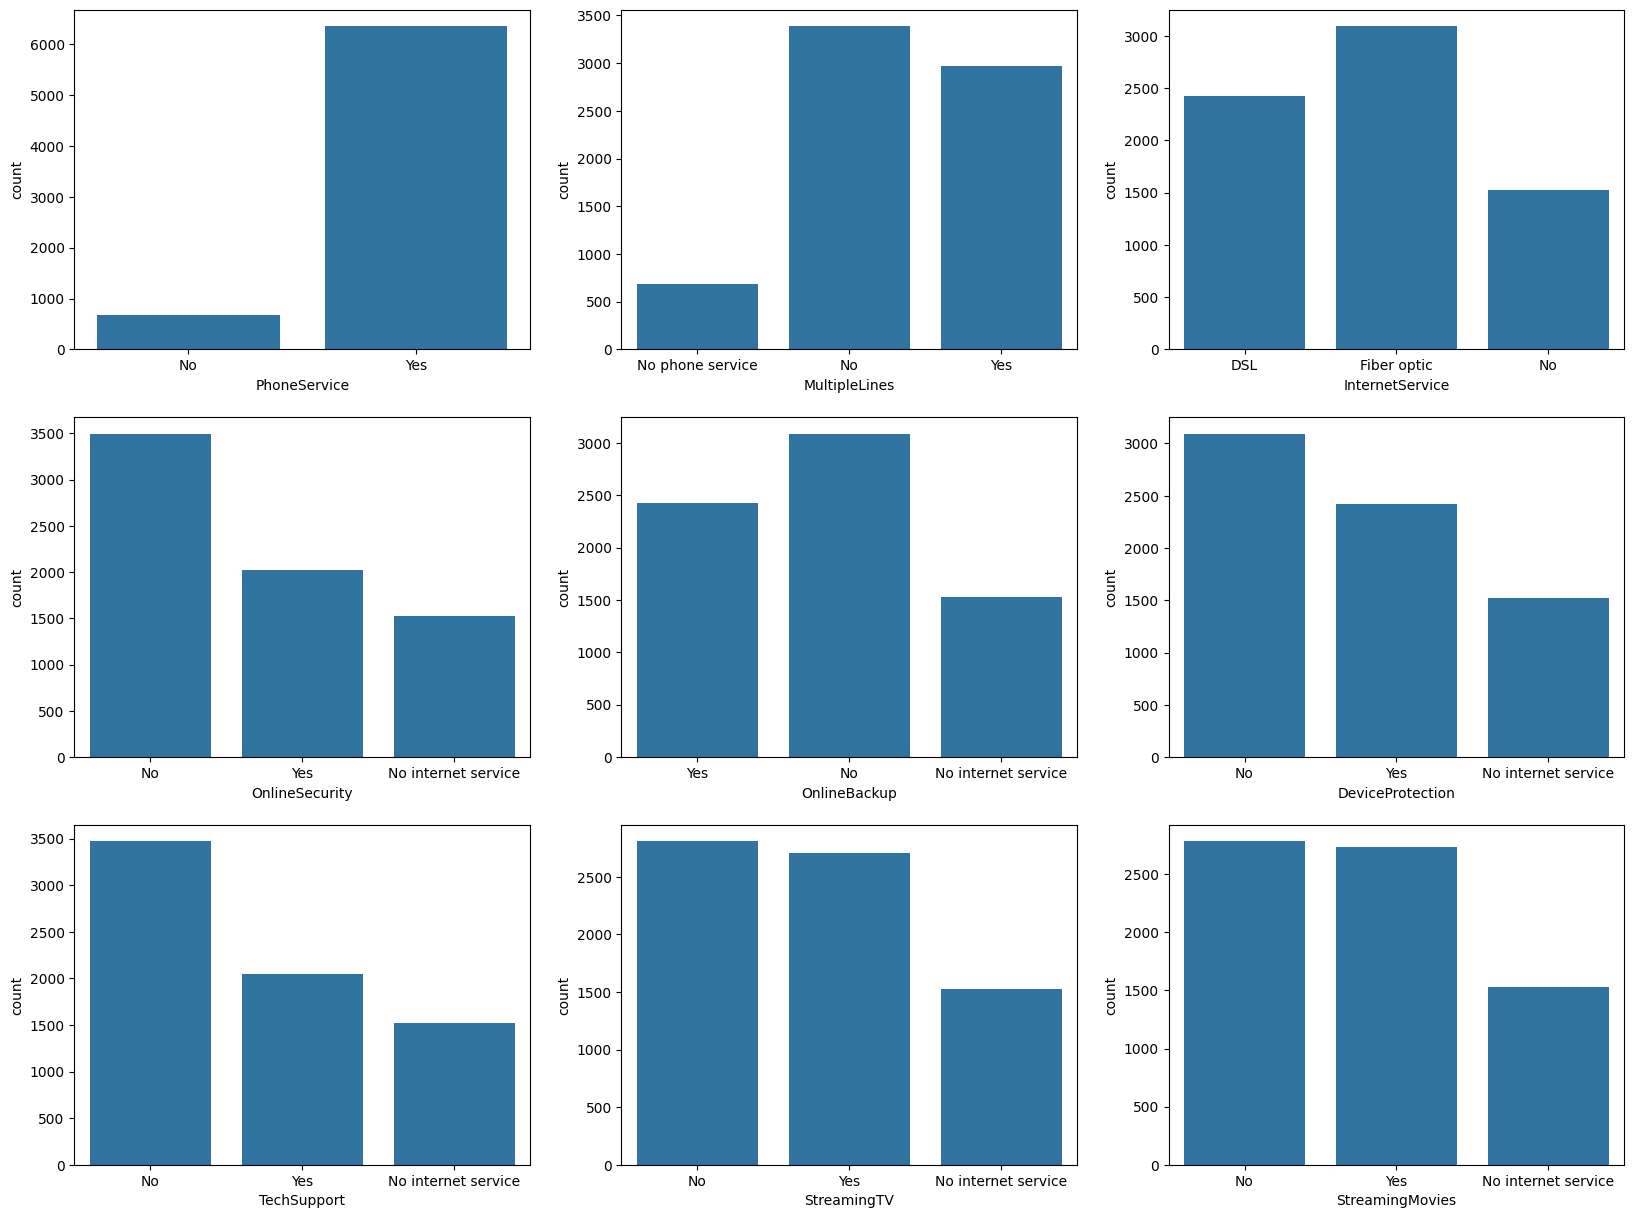

In [ ]:
#Visualizando Serviços
fig, ax = plt.subplots(3,3, figsize=(20,15))

sns.countplot(x= df.PhoneService, ax=ax[0,0])
sns.countplot(x= df.MultipleLines, ax=ax[0,1])
sns.countplot(x= df.InternetService, ax=ax[0,2])
sns.countplot(x= df.OnlineSecurity, ax=ax[1,0])
sns.countplot(x= df.OnlineBackup, ax=ax[1,1])
sns.countplot(x= df.DeviceProtection, ax=ax[1,2])
sns.countplot(x= df.TechSupport, ax=ax[2,0])
sns.countplot(x= df.StreamingTV, ax=ax[2,1])
sns.countplot(x= df.StreamingMovies, ax=ax[2,2])
plt.show()

fig = fig.figure

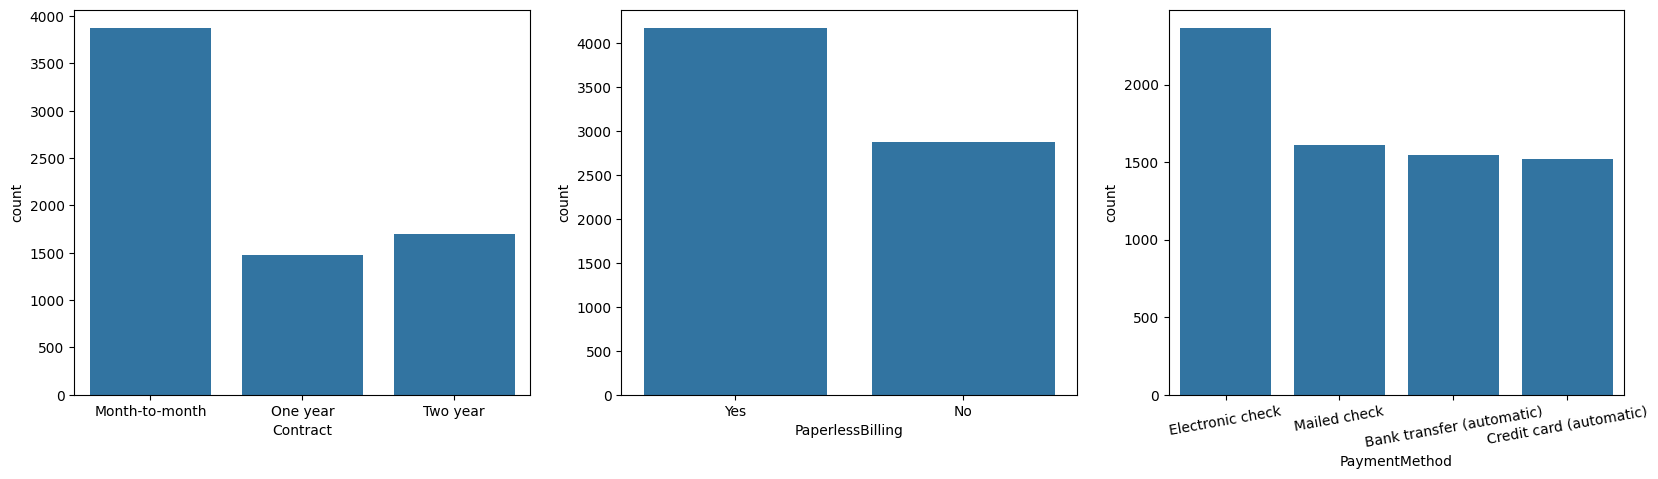

In [ ]:
#Visualizando contrato/pagamentos/mwio de cobrança

fig, ax = plt.subplots(1,3, figsize=(20,5))

sns.countplot(x= df.Contract, ax=ax[0])
sns.countplot(x= df.PaperlessBilling, ax=ax[1])
sns.countplot(x= df.PaymentMethod, ax=ax[2])

plt.xticks(rotation=10)
plt.show()

fig = fig.figure

##Análise dos dados

1. Qual a porcentagem de clientes que cancelaram o serviço (churn)?

In [ ]:
churn_counts = df['Churn'].value_counts(normalize=True).mul(100).round(2)
print(f'Cancelamento do serviço: {churn_counts[1]}%')

Cancelamento do serviço: 26.54%


In [ ]:
fig = go.Figure(data=[go.Bar(
    x=churn_counts.index,
    y=churn_counts.values,
    text=churn_counts.values,
    textposition='auto',
    marker_color=['blue', 'red']
)])

fig.update_layout(
    title='Taxa de Churn',
    xaxis=dict(title='Churn'),
    yaxis=dict(title='Porcentagem'),
)

fig.show()


2. Qual a distribuição dos clientes por gênero, idade (SeniorCitizen), estado civil (Partner), dependentes (Dependents)?

In [ ]:
dist_gender = df['gender'].value_counts(normalize=True).mul(100).round(2)
dist_gender = df['SeniorCitizen'].value_counts(normalize=True).mul(100).round(2)
dist_gender = df['Partner'].value_counts(normalize=True).mul(100).round(2)
dist_gender = df['Dependents'].value_counts(normalize=True).mul(100).round(2)

In [ ]:
dist_gender = df['gender'].value_counts(normalize=True).mul(100).round(2)
fig_gender = go.Figure(go.Bar(
    x=dist_gender.index,
    y=dist_gender.values,
    text=dist_gender.values,
    textposition='auto',
    marker_color='blue'
))
fig_gender.update_layout(title='Gender Distribution (%)', xaxis_title='Gender', yaxis_title='% of Customers')

dist_senior = df['SeniorCitizen'].value_counts(normalize=True).mul(100).round(2)
fig_senior = go.Figure(go.Bar(
    x=dist_senior.index,
    y=dist_senior.values,
    text=dist_senior.values,
    textposition='auto',
    marker_color='green',
))
fig_senior.update_layout(title='Senior Citizen Distribution (%)', xaxis_title='Senior Citizen', yaxis_title='% of Customers')

dist_partner = df['Partner'].value_counts(normalize=True).mul(100).round(2)
fig_partner = go.Figure(go.Bar(
    x=dist_partner.index,
    y=dist_partner.values,
    text=dist_partner.values,
    textposition='auto',
    marker_color='orange'
))
fig_partner.update_layout(title='Partner Distribution (%)', xaxis_title='Partner', yaxis_title='% of Customers')

dist_dependents = df['Dependents'].value_counts(normalize=True).mul(100).round(2)
fig_dependents = go.Figure(go.Bar(
    x=dist_dependents.index,
    y=dist_dependents.values,
    text=dist_dependents.values,
    textposition='auto',
    marker_color='red'
))
fig_dependents.update_layout(title='Dependents Distribution (%)', xaxis_title='Dependents', yaxis_title='% of Customers')

fig = make_subplots(rows=2, cols=2, subplot_titles=("Gender", "Senior Citizen", "Partner", "Dependents"))

fig.add_trace(fig_gender.data[0], row=1, col=1)
fig.add_trace(fig_senior.data[0], row=1, col=2)
fig.add_trace(fig_partner.data[0], row=2, col=1)
fig.add_trace(fig_dependents.data[0], row=2, col=2)

fig.update_layout(title_text="Distributions")

fig.show()

3. Qual a média, mediana e desvio padrão da permanência na empresa (tenure) e dos valores mensais (MonthlyCharges) e totais (TotalCharges)?

In [ ]:
filtro_media = df['tenure'].mean().round(2)
filtro_mediana = df['tenure'].median().round(2)
desvio_padrao = df['tenure'].std().round(2)
print(f'Média: {filtro_media}\nMediana: {filtro_mediana}\nDesvio Padrão: {desvio_padrao}')

Média: 32.37
Mediana: 29.0
Desvio Padrão: 24.56


In [ ]:
fig = px.histogram(df, x='tenure', nbins=100, title='Distribuição de Tenure com Média, Mediana e Desvio Padrão')
fig.update_traces(histnorm='probability density')
fig.update_layout(bargap=0.1)

fig.add_vline(x=filtro_media, line_dash="dash", line_color="green", annotation_text=f"Média: {filtro_media}")

fig.add_vline(x=filtro_mediana, line_dash="dot", line_color="red", annotation_text=f"Mediana: {filtro_mediana}")

fig.add_vline(x=filtro_media + desvio_padrao, line_dash="dashdot", line_color="blue", annotation_text=f"Desvio Padrão: {desvio_padrao}")

fig.add_vline(x=filtro_media - desvio_padrao, line_dash="dashdot", line_color="blue")

fig.show()

In [ ]:
filtro_media = df['MonthlyCharges'].mean().round(2)
filtro_mediana = df['MonthlyCharges'].median().round(2)
desvio_padrao = df['MonthlyCharges'].std().round(2)
print(f'Média: {filtro_media}\nMediana: {filtro_mediana}\nDesvio Padrão: {desvio_padrao}')

Média: 64.76
Mediana: 70.35
Desvio Padrão: 30.09


In [ ]:
fig = px.histogram(df, x='MonthlyCharges', nbins=100, title='Distribuição de MonthlyCharges com Média, Mediana e Desvio Padrão')
fig.update_traces(histnorm='probability density')
fig.update_layout(bargap=0.1)

fig.add_vline(x=filtro_media, line_dash="dash", line_color="green", annotation_text=f"Média: {filtro_media}")

fig.add_vline(x=filtro_mediana, line_dash="dot", line_color="red", annotation_text=f"Mediana: {filtro_mediana}")

fig.add_vline(x=filtro_media + desvio_padrao, line_dash="dashdot", line_color="blue", annotation_text=f"Desvio Padrão: {desvio_padrao}")

fig.add_vline(x=filtro_media - desvio_padrao, line_dash="dashdot", line_color="blue")

fig.show()

In [ ]:
filtro_media = df['TotalCharges'].mean().round(2)
filtro_mediana = df['TotalCharges'].median().round(2)
desvio_padrao = df['TotalCharges'].std().round(2)
print(f'Média: {filtro_media}\nMediana: {filtro_mediana}\nDesvio Padrão: {desvio_padrao}')

Média: 2283.300048828125
Mediana: 1400.550048828125
Desvio Padrão: 2265.0


In [ ]:
fig = px.histogram(df, x='TotalCharges', nbins=100, title='Distribuição de TotalCharges com Média, Mediana e Desvio Padrão')
fig.update_traces(histnorm='probability density')
fig.update_layout(bargap=0.1)

fig.add_vline(x=filtro_media, line_dash="dash", line_color="green", annotation_text=f"Média: {filtro_media}")

fig.add_vline(x=filtro_mediana, line_dash="dot", line_color="red", annotation_text=f"Mediana: {filtro_mediana}")

fig.add_vline(x=filtro_media + desvio_padrao, line_dash="dashdot", line_color="blue", annotation_text=f"Desvio Padrão: {desvio_padrao}")

fig.add_vline(x=filtro_media - desvio_padrao, line_dash="dashdot", line_color="blue")

fig.show()

4. Clientes do gênero masculino ou feminino têm maior propensão ao churn?

In [ ]:
filtro_churn_yes = df['Churn'] == 'Yes'
df_churn_yes = df[filtro_churn_yes].groupby('gender').size().reset_index(name='Count')
df_churn_yes

,gender,Count
0,Female,939
1,Male,930


In [ ]:
fig = go.Figure(go.Bar(
    x=df_churn_yes['gender'],
    y=df_churn_yes['Count'],
    marker_color='blue'
))
fig.update_layout(
    title='Contagem de Churn Yes por Gênero',
    xaxis_title='Gênero',
    yaxis_title='Numero de Pessoas',
)
fig.show()

5. Clientes idosos (SeniorCitizen) tendem a cancelar o serviço com mais frequência?

In [ ]:
filtro_churn_yes = df['Churn'] == 'Yes'
df_churn_yes = df[filtro_churn_yes].groupby('SeniorCitizen').size().reset_index(name='Count')
df_churn_yes

,SeniorCitizen,Count
0,0,1393
1,1,476


In [ ]:
fig = go.Figure(go.Bar(
    x=df_churn_yes['SeniorCitizen'],
    y=df_churn_yes['Count'],
    marker_color='blue'
))
fig.update_layout(
    title='Churn em relaçãoa ser idoso',
    xaxis_title='SeniorCitizen',
    yaxis_title='Numero de Clientes',
    xaxis=dict(
        tickvals=df_churn_yes['SeniorCitizen'],
        ticktext=['Não', 'Sim']
    )
)
fig.show()

6. Clientes casados (Partner) ou com dependentes (Dependents) apresentam taxas de churn diferentes?

In [ ]:
churn_por_estado_civil = df.groupby(['Partner', 'Dependents', 'Churn']).size().unstack()
churn_porcentagem = churn_por_estado_civil['Yes'] / (churn_por_estado_civil['Yes'] + churn_por_estado_civil['No']) * 100
churn_porcentagem.round(2)

Partner  Dependents
No       No            34.24
         Yes           21.33
Yes      No            25.41
         Yes           14.24
dtype: float64

In [ ]:
fig = go.Figure()

for dependents_status in churn_porcentagem.index.levels[0]:
    for partner_status in churn_porcentagem.index.levels[1]:
        key = (partner_status, dependents_status)
        churn_rate = churn_porcentagem.loc[key]
        fig.add_trace(go.Bar(
            x=[f'Partner: {partner_status}, Dependents: {dependents_status}'],
            y=[churn_rate],
            name=f'Partner: {partner_status}, Dependents: {dependents_status}',
            hoverinfo='y+name',
        ))

fig.update_layout(
    title='Taxa de Churn por Estado Civil e Dependentes',
    xaxis_title='Estado Civil e Dependentes',
    yaxis_title='Porcentagem de Churn',
    barmode='group',
    showlegend=True
)

fig.show()

7. Existe alguma relação entre o número de linhas telefônicas (MultipleLines) e o churn?

In [ ]:
contingency_table = pd.crosstab(df['MultipleLines'], df['Churn'], normalize='index').mul(100).round(2)
contingency_table

Churn,No,Yes
MultipleLines,,
No,74.96,25.04
No phone service,75.07,24.93
Yes,71.39,28.61


In [ ]:
fig = go.Figure()
for column in contingency_table.columns:
    fig.add_trace(go.Bar(
        x=contingency_table.index,
        y=contingency_table[column],
        name=column,
        text=contingency_table[column],
        textposition='auto'
    ))
fig.update_layout(
    barmode='stack',
    title='Churn vs MultipleLines',
    xaxis_title='MultipleLines',
    yaxis_title='% of Customers',
)
fig.show()

8. Clientes com internet de fibra óptica (Fiber optic) cancelam menos que os demais?

In [ ]:
filtro_churn_yes = df['Churn'] == 'Yes'
df_churn_yes = df[filtro_churn_yes].groupby('InternetService').size().reset_index(name='Count')
df_churn_yes

,InternetService,Count
0,DSL,459
1,Fiber optic,1297
2,No,113


In [ ]:
fig = go.Figure(go.Bar(
    x=df_churn_yes['InternetService'],
    y=df_churn_yes['Count'],
    marker_color='blue'
))
fig.update_layout(
    title='Churn em relaçao InternetService',
    xaxis_title='InternetService',
    yaxis_title='Numero de Pessoas',
    xaxis=dict(
        tickvals=df_churn_yes['InternetService'],
    )
)
fig.show()

9. Serviços adicionais como segurança online (OnlineSecurity), backup online (OnlineBackup) e proteção de dispositivos (DeviceProtection) afetam a taxa de churn?

In [ ]:
contingency_table_security = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index') * 100
contingency_table_security = contingency_table_security.round(2)

contingency_table_backup = pd.crosstab(df['OnlineBackup'], df['Churn'], normalize='index') * 100
contingency_table_backup = contingency_table_backup.round(2)

contingency_table_protection = pd.crosstab(df['DeviceProtection'], df['Churn'], normalize='index') * 100
contingency_table_protection = contingency_table_protection.round(2)

In [ ]:
service = df['DeviceProtection'] == 'No internet service'
service.sum()

1526

In [ ]:
fig_security = go.Figure()
fig_backup = go.Figure()
fig_protection = go.Figure()

for column in contingency_table_security.columns:
    fig_security.add_trace(go.Bar(
        x=contingency_table_security.index,
        y=contingency_table_security[column],
        name=column,
        text=contingency_table_security[column],
        textposition='auto'
    ))

for column in contingency_table_backup.columns:
    fig_backup.add_trace(go.Bar(
        x=contingency_table_backup.index,
        y=contingency_table_backup[column],
        name=column,
        text=contingency_table_backup[column],
        textposition='auto'
    ))

for column in contingency_table_protection.columns:
    fig_protection.add_trace(go.Bar(
        x=contingency_table_protection.index,
        y=contingency_table_protection[column],
        name=column,
        text=contingency_table_protection[column],
        textposition='auto'
    ))

fig_security.update_layout(
    barmode='stack',
    title='Churn vs OnlineSecurity',
    xaxis_title='OnlineSecurity',
    yaxis_title='% of Customers'
)

fig_backup.update_layout(
    barmode='stack',
    title='Churn vs OnlineBackup',
    xaxis_title='OnlineBackup',
    yaxis_title='% of Customers'
)

fig_protection.update_layout(
    barmode='stack',
    title='Churn vs DeviceProtection',
    xaxis_title='DeviceProtection',
    yaxis_title='% of Customers'
)

fig_security.show()
fig_backup.show()
fig_protection.show()


In [ ]:
#Entendo valores do gráfico
no_serv_security = (df['OnlineSecurity'] == 'No internet service')
no_serv_security = no_serv_security.sum()
no_serv_backup = df['OnlineBackup'] == 'No internet service'
no_serv_backup = no_serv_backup.sum()
no_serv_protection = df['DeviceProtection'] == 'No internet service'
no_serv_protection = no_serv_protection.sum()
[no_serv_security,no_serv_backup, no_serv_protection]

[1526, 1526, 1526]

10. O tipo de contrato (Month to month, One year, Two years) influencia na permanência do cliente?

In [ ]:
contingency_table = pd.crosstab(df['Contract'], df['Churn'], normalize='index').mul(100).round(2)
contingency_table = contingency_table.round(2)

In [ ]:
fig = go.Figure()

for column in contingency_table.columns:
    fig.add_trace(go.Bar(
        x=contingency_table.index,
        y=contingency_table[column],
        name=column,
        text=contingency_table[column],
        textposition='auto'
    ))

fig.update_layout(
    barmode='stack',
    title='Churn vs Contract',
    xaxis_title='Contract',
    yaxis_title='% of Customers'
)

fig.show()

11. Qual a proporção de clientes que possui telefone fixo (PhoneService)?

In [ ]:
quant_service_counts = df['PhoneService'].value_counts()
filtro_phone_service_yes =df['PhoneService'] == 'Yes'
filtro_phone_service_yes = filtro_phone_service_yes.sum()
prop_phone_service = filtro_phone_service_yes / len(df) * 100
prop_phone_service.round(2)

90.32

In [ ]:
fig = go.Figure(data=[go.Pie(labels=quant_service_counts.index, values=quant_service_counts.values, hole=0.5)])
fig.update_layout(title_text="Proporção de clientes com telefone fixo: {}%".format(prop_phone_service.round(2)))
fig.show()

12. Quantos clientes possuem internet (InternetService) e qual a distribuição entre os tipos (DSL, Fiber optic)?

In [ ]:
quant_internet_service= df['InternetService'].value_counts()
clientes_iternet_service = df['InternetService'] != 'No'
clientes_iternet_service = clientes_iternet_service.sum()
distribuicao = quant_internet_service
print(f'Quantidade de Clientes: {clientes_iternet_service}')

Quantidade de Clientes: 5517


In [ ]:
fig = go.Figure(data=[go.Bar(
    x=quant_internet_service.index,
    y=quant_internet_service.values,
    text=distribuicao.round(2).astype(str),
    textposition='auto'
)])

fig.update_layout(title='Clientes com InternetService e distribuição entre os tipos',
                  xaxis_title='Tipo de InternetService',
                  yaxis_title='Quantidade de Clientes')
fig.show()

13. Qual a porcentagem de clientes que utiliza serviços de streaming (StreamingTV, StreamingMovies)?

In [ ]:
clientes_streaming_tv = (df['StreamingTV'] == 'Yes').sum()
clientes_streaming_movies = (df['StreamingMovies'] == 'Yes').sum()

total_clientes = len(df)
servicos_streaming = clientes_streaming_tv | clientes_streaming_movies
servicos_streaming = ((servicos_streaming / total_clientes) * 100).round(2)

porcentagem_streaming_tv = ((clientes_streaming_tv / total_clientes) * 100).round(2)
porcentagem_streaming_movies = ((clientes_streaming_movies / total_clientes) * 100).round(2)

[porcentagem_streaming_movies, porcentagem_streaming_tv, servicos_streaming]

[38.79, 38.44, 39.06]

In [ ]:
labels = ['StreamingMovies', 'StreamingTV', 'Ambos']
values = [porcentagem_streaming_movies, porcentagem_streaming_tv, servicos_streaming]

fig = go.Figure(data=[go.Bar(
    x=labels,
    y=values,
    text=values,
    textposition='auto',
)])

fig.update_layout(title='Porcentagem de clientes que utiliza serviços de streaming',
                  xaxis_title='Serviço de Streaming',
                  yaxis_title='Porcentagem de Clientes')

fig.show()

14. Existe alguma relação entre o valor mensal faturado (MonthlyCharges) e o churn?

In [ ]:
churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
churn_no = df[df['Churn'] == 'No']['MonthlyCharges']

In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=churn_yes, histnorm='percent', name='Churn Yes', marker_color='rgba(255, 0, 0, 0.6)'))
fig.add_trace(go.Histogram(x=churn_no, histnorm='percent', name='Churn No', marker_color='rgba(0, 0, 255, 0.6)'))

fig.update_layout(title='Distribuição do Valor Mensal Faturado (MonthlyCharges) por Churn',
                  xaxis_title='Monthly Charges',
                  yaxis_title='Density (%)',
                  barmode='overlay')

fig.show()

15. O valor total faturado (TotalCharges) está associado a propensão do cliente cancelar o serviço?

In [ ]:
churn_yes = df[df['Churn'] == 'Yes']['TotalCharges']
churn_no = df[df['Churn'] == 'No']['TotalCharges']

fig = go.Figure()

fig.add_trace(go.Histogram(x=churn_yes, histnorm='percent', name='Churn Yes', marker_color='rgba(255, 0, 0, 0.6)'))
fig.add_trace(go.Histogram(x=churn_no, histnorm='percent', name='Churn No', marker_color='rgba(0, 0, 255, 0.6)'))

fig.update_layout(title='Distribuição do Valor Total Faturado (TotalCharges) por Churn',
                  xaxis_title='Total Charges',
                  yaxis_title='Density (%)',
                  barmode='overlay')

fig.show()

16.  Qual o método de pagamento mais utilizado pelos clientes (Electronic check, Postal check, Bank transfer, Credit card)?

In [ ]:
metodo_pagamento_counts = df['PaymentMethod'].value_counts()
metodo_pagamento_counts

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
fig = go.Figure(go.Bar(
    x=metodo_pagamento_counts.index,
    y=metodo_pagamento_counts.values,
))

fig.update_layout(title='Método de Pagamento Mais Utilizado',
                  xaxis_title='Método de Pagamento',
                  yaxis_title='Número de Clientes')

fig.show()

17. Existe alguma relação entre o método de pagamento e o churn?

In [ ]:
churn_por_metodo_pagamento = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
churn_por_metodo_pagamento

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [ ]:
fig = go.Figure()

for churn_status in churn_por_metodo_pagamento.columns:
    fig.add_trace(go.Bar(
        x=churn_por_metodo_pagamento.index,
        y=churn_por_metodo_pagamento[churn_status],
        name=churn_status
    ))

fig.update_layout(title='Relação entre Método de Pagamento e Churn',
                  xaxis_title='Método de Pagamento',
                  yaxis_title='Número de Clientes',
                  barmode='stack')

fig.show()


18. Clientes com fatura eletrônica (PaperlessBilling) tendem a cancelar menos?

In [ ]:
churn_por_faturamento = df.groupby(['PaperlessBilling', 'Churn']).size().unstack()
proporcao_churn = churn_por_faturamento['Yes'] / churn_por_faturamento.sum(axis=1)

proporcao_churn

PaperlessBilling
No     0.163301
Yes    0.335651
dtype: float64

In [ ]:
fig = go.Figure(go.Bar(
    x=proporcao_churn.index,
    y=proporcao_churn.values * 100,
))

fig.update_layout(title='Proporção de Churn por Tipo de Faturamento',
                  xaxis_title='Tipo de Faturamento',
                  yaxis_title='Porcentagem de Churn',
                  yaxis_tickformat='.1f')

fig.show()


##Outras informações

In [ ]:
columns = df.select_dtypes("number").columns
columns_not_number = ['SeniorCitizen']
df_number = df.select_dtypes('number')
df_number = df_number.drop(columns_not_number, axis = 1)

In [ ]:
df_number.describe(percentiles=[0.25, 0.50, 0.75, 0.9])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300537
std,24.559481,30.090047,2265.000244
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.350000,1400.550049
75%,55.000000,89.850000,3786.599976
90%,69.000000,102.600000,5973.689844
max,72.000000,118.750000,8684.799805


In [ ]:
df_number.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


<Axes: >

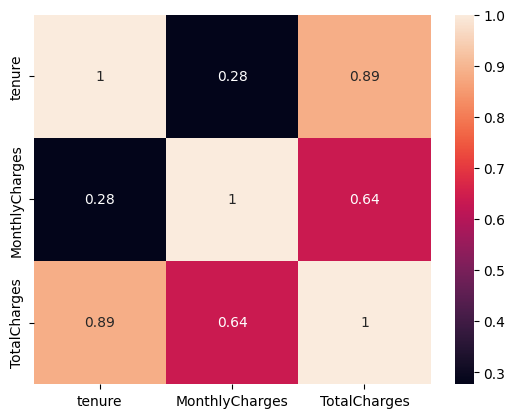

In [ ]:
sns.heatmap(df_number.corr('spearman'), annot= True)

##Correlações adicionais

1. Existe relação entre a duração do contrato (tenure) e o churn?

In [ ]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [ ]:
fig = px.box(df, x='Churn', y='tenure', points='all', title='Distribuição da Duração do Contrato por Churn',
             labels={'Churn': 'Churn', 'tenure': 'Duração do Contrato'})
fig.show()

2. Clientes com serviço de telefone (PhoneService) têm churn diferentes daqueles sem serviço de telefone?:

In [ ]:
filtro_churn_yes = df['Churn'] == 'Yes'
df_churn_yes = df[filtro_churn_yes].groupby('PhoneService').size().reset_index(name='Count')
df_churn_yes

,PhoneService,Count
0,No,170
1,Yes,1699


In [ ]:
fig = go.Figure(go.Bar(
    x=df_churn_yes['PhoneService'],
    y=df_churn_yes['Count'],
    marker_color='blue'
))
fig.update_layout(
    title='Churn em relaçao PhoneService',
    xaxis_title='PhoneService',
    yaxis_title='Numero de Pessoas',
    xaxis=dict(
        tickvals=df_churn_yes['PhoneService'],
    )
)
fig.show()

3. Existe relação entre a utilização de serviços de suporte técnico (TechSupport) e o churn?

In [ ]:
filtro_churn_yes = df['Churn'] == 'Yes'
df_churn_yes = df[filtro_churn_yes].groupby('TechSupport').size().reset_index(name='Count')
df_churn_yes

,TechSupport,Count
0,No,1446
1,No internet service,113
2,Yes,310


In [ ]:
fig = go.Figure(go.Bar(
    x=df_churn_yes['TechSupport'],
    y=df_churn_yes['Count'],
    marker_color='blue'
))
fig.update_layout(
    title='Churn em relaçao TechSupport',
    xaxis_title='TechSupport',
    yaxis_title='Numero de Pessoas',
    xaxis=dict(
        tickvals=df_churn_yes['TechSupport'],
    )
)
fig.show()